# Credit Card Fraud Detection Model using RandomForestClassifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

C:\Users\user\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Set up my stuff

In [2]:
matplotlib.rcParams['figure.figsize'] = (16, 8)
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [3]:
credit_df = pd.read_csv('creditcard.csv')

In [4]:
credit_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


We can see that the data set has gone through the process of dimensionality reduction PCA and that's why we features V1 through to V28.

In [5]:
credit_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [6]:
classes = credit_df.Class.value_counts()

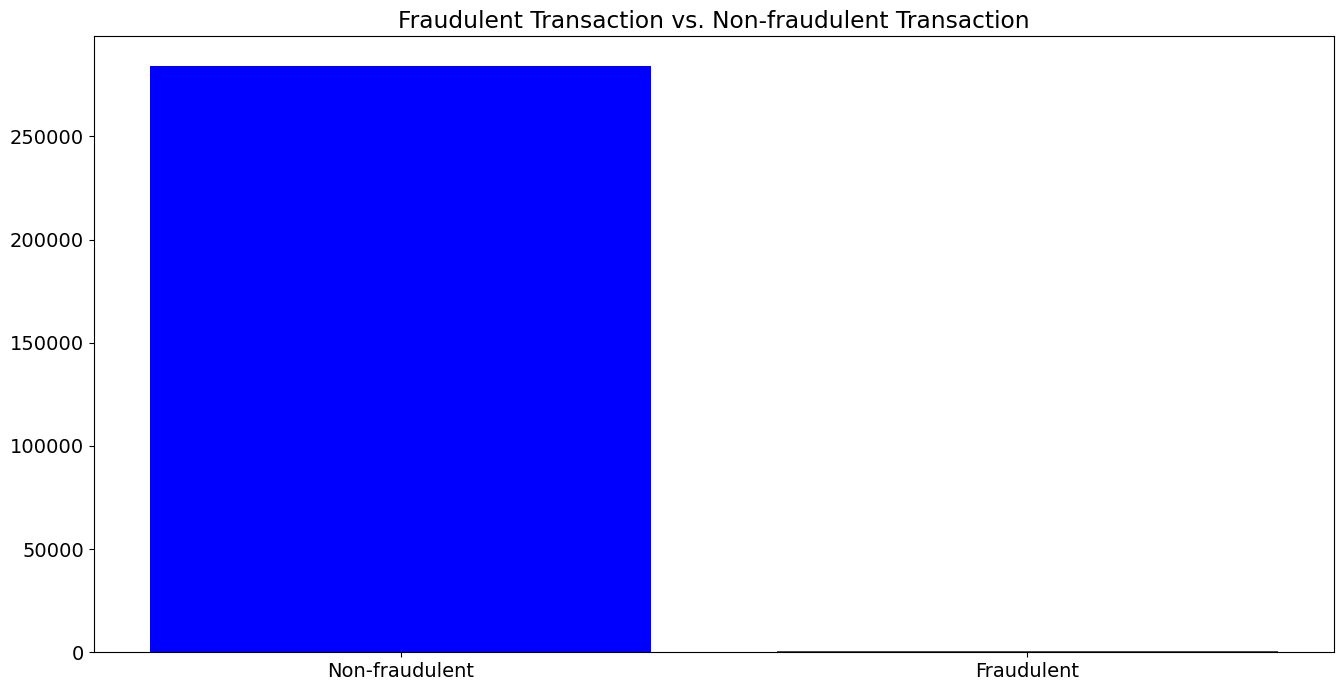

In [7]:
plt.bar(classes.index, classes.values, color=['Blue', 'Red'])
plt.title('Fraudulent Transaction vs. Non-fraudulent Transaction')
plt.xticks([0, 1], ['Non-fraudulent', 'Fraudulent']);

In [8]:
classes

Class
0    284315
1       492
Name: count, dtype: int64

The dataset is an imbalanced dataset so i'll use SMOTE which generates synthetic samples for minority class to balance imbalanced datasets, improving model performance by increasing minority class representation and in this case the minority class being 1 (fraudulent transactions)

In [9]:
X = credit_df.drop('Class', axis=1)
y = credit_df['Class']

In [10]:
from imblearn.over_sampling import SMOTE

In [11]:
smote = SMOTE()

In [12]:
X_rsamp, y_rsamp = smote.fit_resample(X, y)

In [13]:
#X_rsamp.value_counts()

In [14]:
y_rsamp.value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

Now we can see the effect of SMOTE so let's proceed to split the dataset

In [15]:
credit_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [16]:
from sklearn.model_selection import train_test_split as tts

In [17]:
train_val_input, test_input, train_val_target, test_target = tts(X_rsamp, y_rsamp, test_size=0.2, random_state=42)
train_input, val_input, train_target, val_target = tts(train_val_input, train_val_target, test_size=0.25, random_state=42)

In [18]:
train_input.shape, val_input.shape, test_input.shape

((341178, 30), (113726, 30), (113726, 30))

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
?RandomForestClassifier

In [21]:
model = RandomForestClassifier(n_jobs=-1, random_state=42)

In [22]:
%%time
model.fit(train_input, train_target)

CPU times: total: 10min 52s
Wall time: 3min 55s


RandomForestClassifier(n_jobs=-1, random_state=42)

In [24]:
model.score(train_input, train_target)

1.0

In [23]:
model.score(val_input, val_target)

0.9998944832316269

In [25]:
model.score(test_input, test_target)

0.9998944832316269

The model is very accurate even though my pc made a lot of noise while training.